In [ ]:
#1.Build a machine learning model to identify fraudulent credit card transactions. Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
#2.Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
#3.Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
#load the dataset
df=pd.read_csv('/content/creditcard.csv')
df.shape

(140703, 31)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140698,83876,1.297031,0.260234,-0.165836,0.304460,0.238056,-0.084983,-0.056115,0.029952,-0.115999,...,-0.315545,-0.948937,-0.024322,-0.883643,0.335230,0.150161,-0.029612,0.008220,0.99,0.0
140699,83876,1.200272,0.259410,0.397862,0.631576,-0.476806,-0.882324,-0.062362,-0.028223,-0.130967,...,-0.231443,-0.739076,0.151545,0.475489,0.134602,0.066882,-0.031207,0.020989,0.89,0.0
140700,83877,-0.939078,1.234767,1.433774,-0.097576,-0.255769,-0.689204,0.509961,0.153369,0.179511,...,-0.257956,-0.582912,0.080816,0.334513,-0.257496,0.094942,0.487942,0.239537,4.49,0.0
140701,83879,1.170286,0.563313,-0.271928,1.394477,-0.038260,-1.000654,0.126524,-0.031662,0.139095,...,-0.038141,-0.086158,-0.033513,0.220516,0.517620,-0.312217,0.041102,0.053760,1.00,0.0


In [ ]:
df['Class'].value_counts()

0.0    140438
1.0       264
Name: Class, dtype: int64

In [ ]:
df['Class'].isna().sum()

1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140703 entries, 0 to 140702
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    140703 non-null  int64  
 1   V1      140703 non-null  float64
 2   V2      140703 non-null  float64
 3   V3      140703 non-null  float64
 4   V4      140703 non-null  float64
 5   V5      140702 non-null  float64
 6   V6      140702 non-null  float64
 7   V7      140702 non-null  float64
 8   V8      140702 non-null  float64
 9   V9      140702 non-null  float64
 10  V10     140702 non-null  float64
 11  V11     140702 non-null  float64
 12  V12     140702 non-null  float64
 13  V13     140702 non-null  float64
 14  V14     140702 non-null  float64
 15  V15     140702 non-null  float64
 16  V16     140702 non-null  float64
 17  V17     140702 non-null  float64
 18  V18     140702 non-null  float64
 19  V19     140702 non-null  float64
 20  V20     140702 non-null  float64
 21  V21     14

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140703.000000,140703.000000,140703.000000,140703.000000,140703.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,...,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000
mean,52017.063240,-0.249590,0.018631,0.672709,0.139629,-0.282394,0.079221,-0.117074,0.065108,-0.092798,...,-0.039490,-0.118699,-0.033307,0.011971,0.130149,0.023568,0.000598,0.002314,91.113847,0.001876
std,20935.874366,1.815360,1.612924,1.267514,1.321903,1.306687,1.283716,1.166104,1.230387,1.088043,...,0.721606,0.635249,0.591371,0.595799,0.437282,0.491940,0.388942,0.306960,247.063579,0.043276
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38001.000000,-1.020857,-0.563417,0.169911,-0.713458,-0.903456,-0.661857,-0.603665,-0.130976,-0.714885,...,-0.226122,-0.548084,-0.171745,-0.325037,-0.136357,-0.326105,-0.060363,-0.004166,6.000000,0.000000
50%,53833.000000,-0.270868,0.105003,0.750128,0.167426,-0.314577,-0.176481,-0.064121,0.080542,-0.155239,...,-0.059815,-0.095822,-0.044999,0.068728,0.166478,-0.064879,0.011792,0.023610,23.900000,0.000000
75%,69573.000000,1.157957,0.777163,1.362846,0.992618,0.237702,0.465523,0.409937,0.375410,0.481411,...,0.113589,0.300817,0.083280,0.408711,0.418682,0.286656,0.087069,0.077145,80.910000,0.000000
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


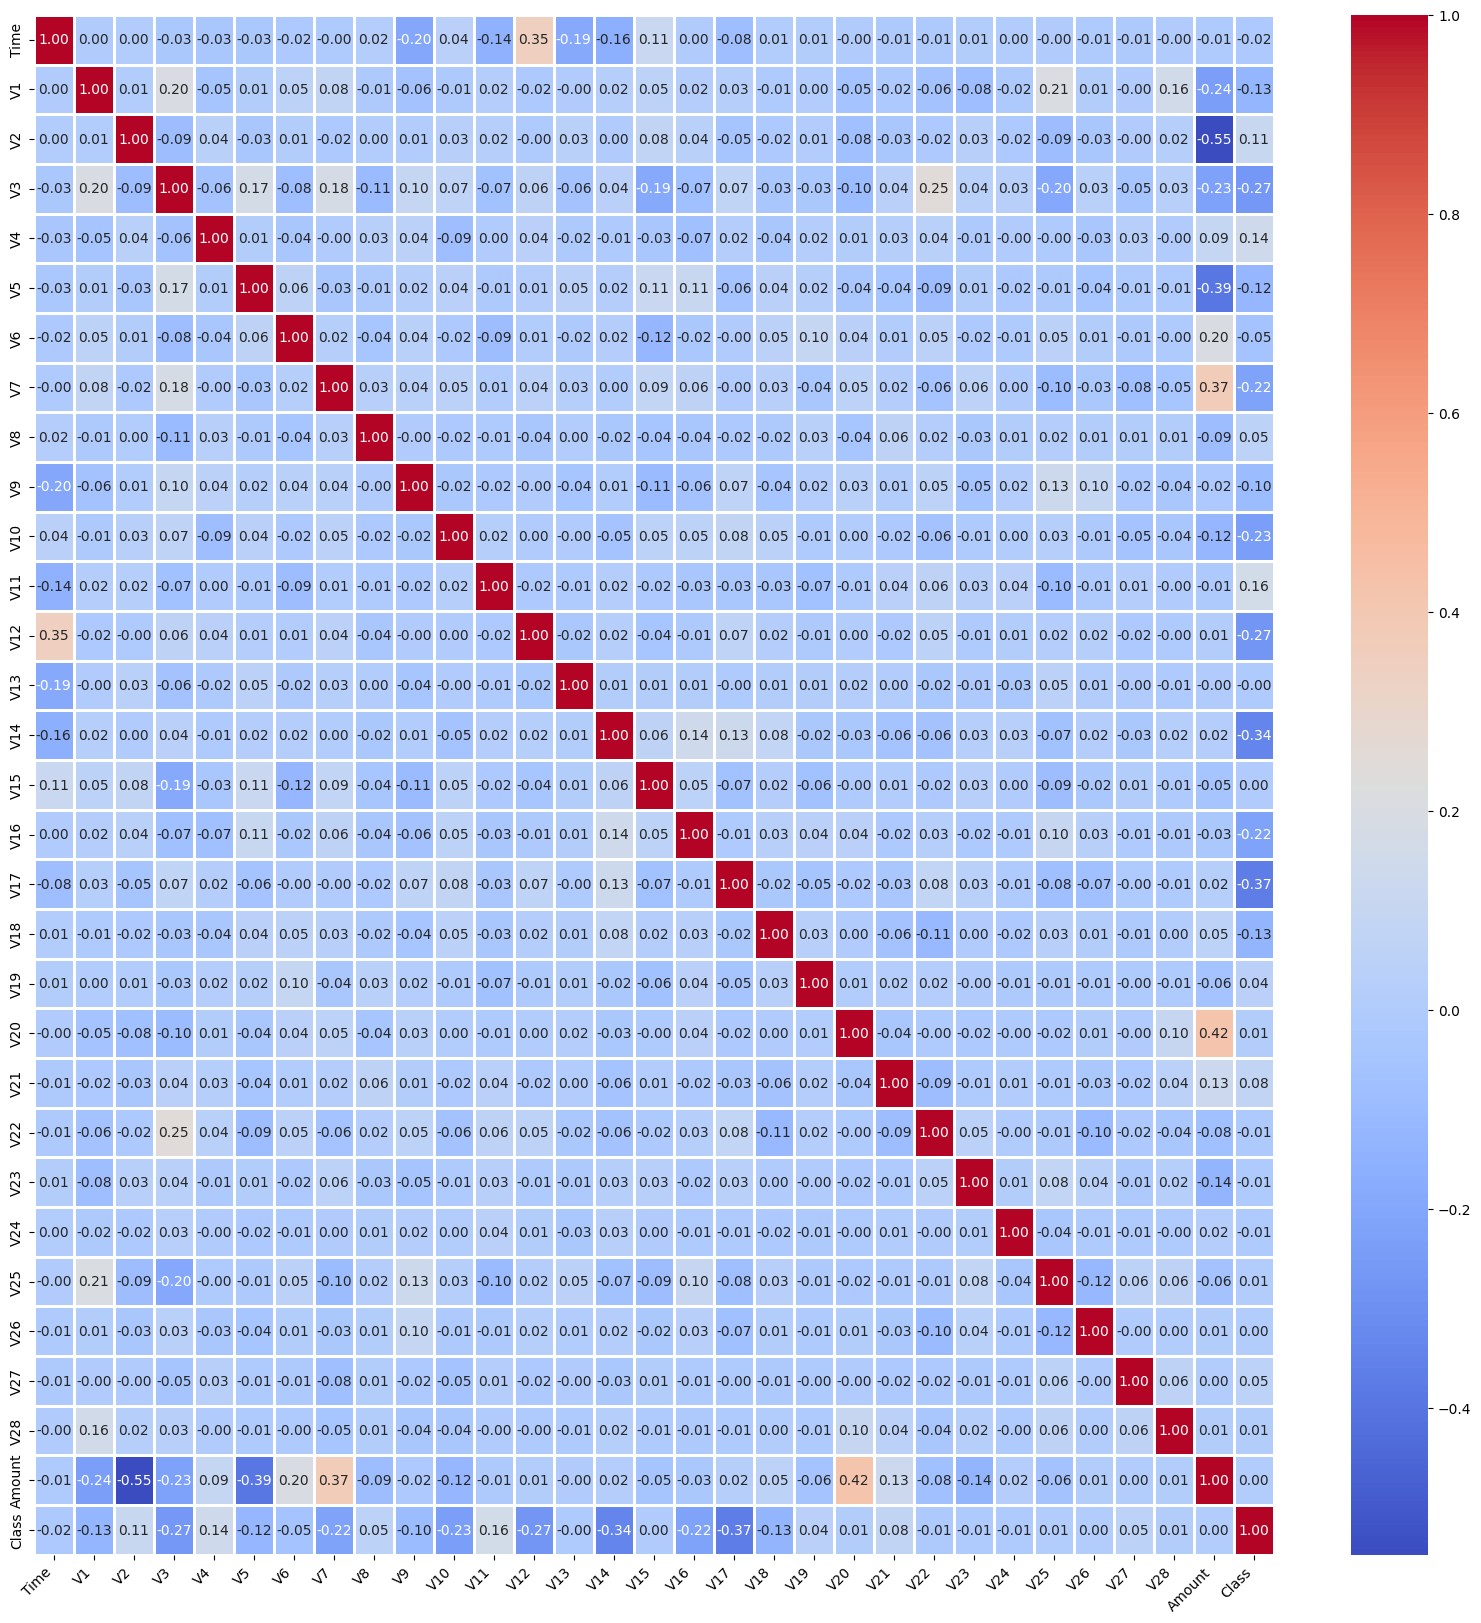

In [ ]:
plt.figure(figsize=(20, 20))

# Create the heatmap with labels and annotations
dataplot = sns.heatmap(
    df.corr(),
    annot=True,  # Display the correlation values in each cell
    cmap='coolwarm',  # Choose a suitable colormap
    fmt='.2f',  # Format the correlation values with 2 decimal places
    linewidths=1,  # Adjust cell border width
)
# Rotate x-axis labels for better readability
dataplot.set_xticklabels(dataplot.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
#check if the dataframe has null values or not
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#dropping the null values
df.dropna(inplace = True)

In [ ]:
#normalizing the data
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(df))

[[ 0.00000000e+00 -9.08530061e-03 -4.86273988e-04 ... -1.40662094e-04
   9.99658439e-01  0.00000000e+00]
 [ 0.00000000e+00  3.14200001e-01  7.01632379e-02 ...  3.88161797e-03
   7.09143734e-01  0.00000000e+00]
 [ 2.64054194e-03 -3.58679087e-03 -3.53875680e-03 ... -1.57777241e-04
   9.99867610e-01  0.00000000e+00]
 ...
 [ 9.99999999e-01  1.43100761e-05  3.09277740e-06 ...  2.50240045e-07
   1.06109018e-05  0.00000000e+00]
 [ 9.99999998e-01 -1.11958887e-05  1.47211583e-05 ...  2.85581174e-06
   5.35307652e-05  0.00000000e+00]
 [ 9.99999999e-01  1.39520760e-05  6.71578304e-06 ...  6.40920596e-07
   1.19219352e-05  0.00000000e+00]]


In [ ]:
df['Class'].value_counts()

0.0    140438
1.0       264
Name: Class, dtype: int64

In [ ]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [ ]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,...,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.000000,140438.0
mean,52034.876842,-0.239504,0.011245,0.687392,0.131415,-0.275448,0.082153,-0.106135,0.062394,-0.088075,...,-0.041927,-0.118336,-0.033151,0.012195,0.130022,0.023506,-0.000321,0.002165,91.068217,0.0
std,20931.295898,1.774935,1.594848,1.174637,1.303607,1.275903,1.280446,1.104720,1.186433,1.078613,...,0.697572,0.632414,0.587462,0.595962,0.436132,0.492069,0.385991,0.306258,247.065709,0.0
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.0
25%,38015.000000,-1.017745,-0.564891,0.172932,-0.714997,-0.901003,-0.660221,-0.601647,-0.131065,-0.712449,...,-0.226210,-0.547951,-0.171476,-0.324890,-0.136221,-0.326226,-0.060451,-0.004160,6.000000,0.0
50%,53851.500000,-0.268002,0.103661,0.752096,0.164795,-0.313389,-0.175385,-0.063165,0.080237,-0.153884,...,-0.060135,-0.095859,-0.044919,0.068818,0.166456,-0.064901,0.011663,0.023571,23.900000,0.0
75%,69587.000000,1.158262,0.773689,1.364346,0.987619,0.238018,0.466413,0.410509,0.374194,0.482713,...,0.112756,0.300677,0.083227,0.408827,0.418372,0.286249,0.086580,0.076830,80.760000,0.0
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,18.709255,15.594995,...,22.614889,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,0.0


In [ ]:
normal.Amount.describe()

count    140438.000000
mean         91.068217
std         247.065709
min           0.000000
25%           6.000000
50%          23.900000
75%          80.760000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0
mean,42420.212121,-5.610819,3.946507,-7.143814,4.512206,-3.977333,-1.480669,-5.936405,1.508791,-2.604923,...,1.256981,-0.311690,-0.116543,-0.107463,0.197988,0.056528,0.489643,0.081783,115.387008,1.0
std,21154.722325,7.204831,4.250621,7.828241,2.859998,5.517041,1.919342,6.460646,7.493201,2.398324,...,4.128693,1.512209,1.674697,0.488234,0.850717,0.417074,1.064341,0.563846,245.189867,0.0
min,406.000000,-30.552380,-6.976420,-31.103685,-1.313275,-22.105532,-5.080408,-21.922811,-37.353443,-9.283925,...,-2.475962,-8.887017,-19.254328,-1.632653,-4.781606,-1.123534,-3.908080,-1.869290,0.000000,1.0
25%,26890.000000,-8.007196,1.210655,-9.916605,2.350383,-5.756638,-2.730993,-10.150800,-0.014967,-3.884753,...,0.075963,-0.632440,-0.439846,-0.435117,-0.196202,-0.253083,0.038301,-0.020835,1.000000,1.0
50%,41459.000000,-2.844077,2.701201,-4.471696,4.146134,-2.180788,-1.429674,-3.238439,0.706038,-2.302182,...,0.628618,-0.055616,-0.136185,-0.033410,0.194756,-0.033472,0.508811,0.189917,9.560000,1.0
75%,58869.250000,-0.729581,6.149683,-1.457860,6.269029,-0.341609,-0.453125,-1.198061,2.685547,-0.741539,...,1.732637,0.383330,0.204436,0.234083,0.634296,0.398493,1.219100,0.403015,99.990000,1.0
max,82289.000000,1.296231,16.713389,2.250210,11.927512,5.269255,5.760059,5.431271,20.007208,2.820829,...,27.202839,1.745315,5.303607,0.795190,2.208209,1.246604,3.052358,1.130625,1809.680000,1.0


In [ ]:
fraud.Amount.describe()

count     264.000000
mean      115.387008
std       245.189867
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,52034.876842,-0.239504,0.011245,0.687392,0.131415,-0.275448,0.082153,-0.106135,0.062394,-0.088075,...,0.042180,-0.041927,-0.118336,-0.033151,0.012195,0.130022,0.023506,-0.000321,0.002165,91.068217
1.0,42420.212121,-5.610819,3.946507,-7.143814,4.512206,-3.977333,-1.480669,-5.936405,1.508791,-2.604923,...,0.239899,1.256981,-0.311690,-0.116543,-0.107463,0.197988,0.056528,0.489643,0.081783,115.387008


In [ ]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
normal_sample = normal.sample(n=492)
# Concatenating two DataFrames
new_df = pd.concat([normal_sample, fraud], axis=0)
# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51215,44843,-1.338542,2.098503,0.585774,2.850198,-0.483856,0.683142,-0.694780,0.280511,-0.766436,...,0.753585,-0.139759,-0.012962,-0.465145,-0.100534,0.323851,0.315796,0.160517,0.76,0.0
88554,62189,-0.420930,0.762651,0.960768,0.317460,-0.650647,-0.566987,0.200835,0.372217,0.014667,...,0.069160,0.243666,0.024533,0.434262,-0.194786,0.437110,-0.105777,-0.029428,39.09,0.0
85319,60724,1.283527,0.422456,-0.382860,0.831089,0.415158,-0.479805,0.422424,-0.154951,-0.466151,...,0.007170,0.039173,-0.240192,-0.340658,0.908934,-0.270624,-0.013622,-0.006654,1.00,0.0
95805,65475,-0.068583,0.743161,0.959810,0.950848,0.024594,-0.251905,0.790408,-0.015320,-0.472314,...,0.184536,0.497522,0.050486,0.063928,-0.227822,-0.300620,0.076016,0.043033,62.66,0.0
66053,51859,-1.442338,0.966509,-0.015842,-2.390541,0.435558,-0.169005,0.741196,-0.363879,0.246735,...,-0.107687,0.663523,-0.317357,-0.940211,0.176694,-0.292893,0.708184,0.194644,20.00,0.0


In [ ]:
# Getting the distribution of the classes for the subsample dataset
new_df['Class'].value_counts()

0.0    492
1.0    264
Name: Class, dtype: int64

In [ ]:
new_df.shape

(756, 31)

In [ ]:
# Splitting the data into Features & Targets
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [ ]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)

(756, 30) (604, 30) (152, 30)


In [ ]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [ ]:
# import pipeline
from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score

# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print(f'accuracy_score = {accuracy_score(y_test,y_pred)}')
print(f'recall_score = {recall_score(y_test,y_pred)}')
print(f'precision_score = {precision_score(y_test,y_pred)}')
print('f1 Score: ', f1_score(y_test, y_pred))
print('classification_report =')
print(classification_report(y_test,y_pred))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9486639118457301
accuracy_score = 0.9605263157894737
recall_score = 0.9148936170212766
precision_score = 0.9555555555555556
f1 Score:  0.9347826086956522
classification_report =
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       105
         1.0       0.96      0.91      0.93        47

    accuracy                           0.96       152
   macro avg       0.96      0.95      0.95       152
weighted avg       0.96      0.96      0.96       152



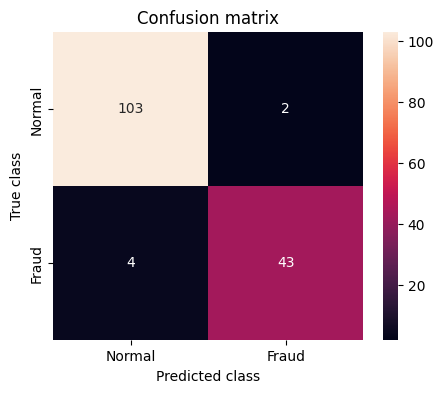

In [ ]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(5, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()